In [10]:
import numpy as np
import matplotlib.pyplot as plt

$Linear \space Regression$ 

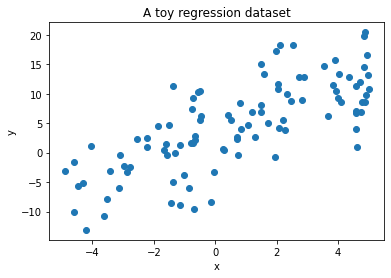

In [11]:
#create a dataset
b = 3
m = 2
M = 100
#generate N(0, 5) noise
eps = np.random.normal(0, 5, M)
x = np.random.uniform(-5, 5, M)
y = b + m*x + eps 
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title("A toy regression dataset")
plt.show()

In [12]:
#we want y_hat = w_0 + w_1*x_1, (y_hat ~ y)
#Way 1: using exact equation for (x^T x)^-1 x^T y
#augnment x as a (ones, x1): (Mx2)
ones = np.ones(M).reshape(M, 1)
x1 = x.reshape(M, 1)
y1 = y.reshape(M, 1)
X = np.concatenate([ones, x1], axis=1)

Xt_X = np.linalg.inv(np.matmul(X.T, X))  #(x^Tx)^-1
w_hat = np.matmul(np.matmul(Xt_X, X.T), y1) # (x^Tx)^-1(X^T y)
print(w_hat)

[[3.28478436]
 [1.94239883]]


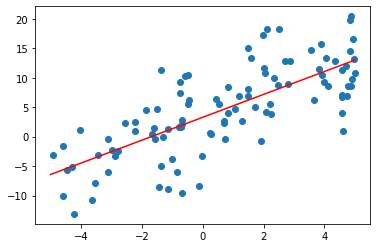

In [13]:
def plot_curve(x, y, w_hat):
  plt.scatter(x, y)
  x_hat = np.linspace(-5, 5, 1000)
  y_hat = w_hat[0, 0] + w_hat[1, 0]*x_hat
  plt.plot(x_hat, y_hat, '-r')
plot_curve(x, y, w_hat)

In [15]:
#with gradient descent
def loss_f(X, w, y):
  D = (X@w - y)/len(y)
  #vectorized
  return (0.5* D.T @  D).squeeze() 

def gradient(X, w, y):
  #vectorized implementation: parallelize in numpy
  return (X.T @ (X@w-y))/len(y)

In [16]:
def learn_params(X, y, lr, num_epochs):
  w = np.zeros(shape=(2, 1))
  loss = []
  for i in range(num_epochs):
    w = w - lr*gradient(X, w, y)
    loss.append(loss_f(X, w, y))
  return w, loss

w, loss = learn_params(X, y1, 0.2, 100)
print(w)

[[3.28478436]
 [1.94239883]]


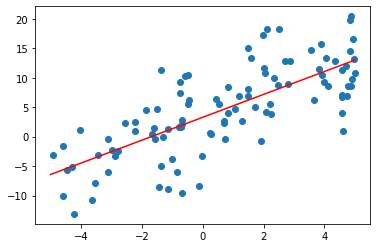

In [17]:
plot_curve(x, y, w)

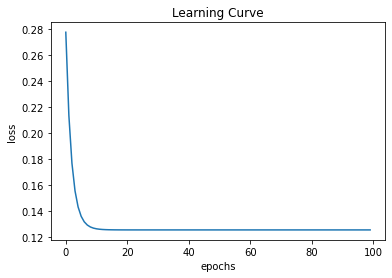

In [18]:
plt.plot(loss)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Learning Curve")
plt.show()

In [19]:
w, loss = learn_params(X, y1, 0.002, 100)
print(w)

[[0.69608299]
 [1.79781989]]


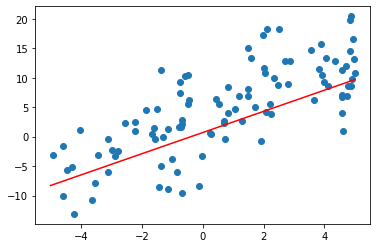

In [20]:
plot_curve(x, y, w)

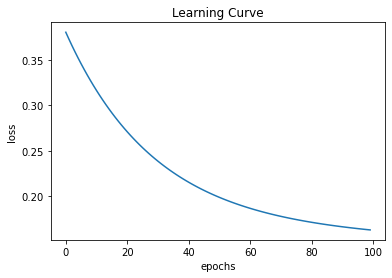

In [21]:
plt.plot(loss)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Learning Curve")
plt.show()

In [22]:
w, loss = learn_params(X, y1, 0.002, 20000)
print(w)

[[3.28478436]
 [1.94239883]]


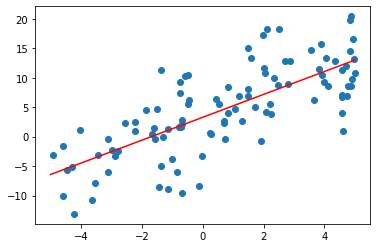

In [23]:
plot_curve(x, y, w)

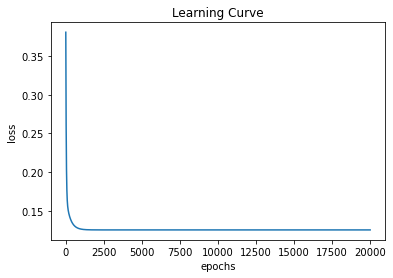

In [24]:
plt.plot(loss)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Learning Curve")
plt.show()

In [27]:
w, loss = learn_params(X, y1, 2, 200)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_20404\326843671.py:5: RuntimeWarning: overflow encountered in matmul
  return (0.5* D.T @  D).squeeze()


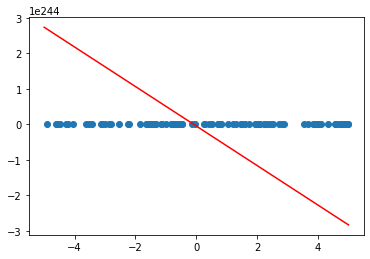

In [28]:
plot_curve(x, y, w)

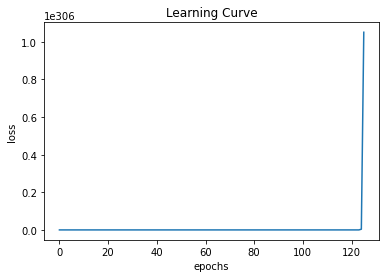

In [29]:
plt.plot(loss)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Learning Curve")
plt.show()